In [84]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

In [431]:
## images  

lady = r'D:\Downloads\Q1 Dataset\lady.png'
stroke_lady = r'D:\Downloads\Q1 Dataset\lady stroke 1.png'

mona = r'D:\Downloads\Q1 Dataset\Mona-lisa.png'
stroke_mona = r'D:\Downloads\Q1 Dataset\Mona-lisa stroke 1.png'

uncle = r'D:\Downloads\Q1 Dataset\van Gogh.png'
stroke_uncle = r'D:\Downloads\Q1 Dataset\van Gogh stroke.png'

In [432]:
# read image 
def image(img , stroke):
    
   
    image = np.array(Image.open(img))
    # Load the image containing the strokes
    stroke_image = np.array(Image.open(stroke))
    #stroke_data
    
    return image, stroke_image

def seed_pixel(stroke_data):
    tolerance = 10
    
    # If the stroke image has an alpha channel, remove it
    if stroke_data.shape[2] == 4:
        stroke_data = stroke_data[:, :, :3]
        
    foreground_seed = []  # List for red pixels
    background_seed = []  # List for blue pixels

    # Loop through all pixels of the stroke image
    for i in range(stroke_data.shape[0]):
        for j in range(stroke_data.shape[1]):
            # Check if the pixel is close to red or blue based on Euclidean distance
            if ((stroke_data[i, j, 0] - 255) ** 2 + stroke_data[i, j, 1] ** 2 + stroke_data[i, j, 2] ** 2) < tolerance ** 2:
                foreground_seed.append([i, j])  # Pixel coordinates -> foreground seed list
                
            elif (stroke_data[i, j, 0] ** 2 + stroke_data[i, j, 1] ** 2 + (stroke_data[i, j, 2] - 255) ** 2) < tolerance ** 2:
                background_seed.append([i, j])  # Pixel coordinates -> background seed list

    # Convert lists to NumPy arrays
    foreground_seed = np.array(foreground_seed)
    background_seed = np.array(background_seed)

    return foreground_seed, background_seed

def kmeans(data, k, max_iterations=100):
    centroids_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids_indices]
    
    for iteration in range(max_iterations):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
  
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    labels = np.argmin(np.linalg.norm(data[:, None] - centroids, axis=2), axis=1)
    return labels, centroids

def compute_pixel_probability(pixel, cluster_centers, weights, wk):
    probabilities = np.zeros(len(cluster_centers))
    for k, center in enumerate(cluster_centers):
        distance = np.linalg.norm(pixel - center)
        probabilities[k] = weights[k] * np.exp((-wk * distance)**2)
    return np.sum(probabilities)

def foreground_background_likelihood(pixels, foreground_clusters, background_clusters, wk):
    pfg = np.zeros(len(pixels))
    pbg = np.zeros(len(pixels))

    for i, pixel in enumerate(pixels):
        pfg[i] = compute_pixel_probability(pixel, foreground_clusters, np.ones(len(foreground_clusters)), wk)
        pbg[i] = compute_pixel_probability(pixel, background_clusters, np.ones(len(background_clusters)), wk)

    return pfg, pbg

def segment_image(image, foreground_seed, background_seed, N, wk=0.1):
    
    data_points = np.reshape(image, (-1, 3))
    
    cluster_indices, cluster_centers = kmeans(data_points, N)
    
    foreground_pixels = image[foreground_seed[:, 0], foreground_seed[:, 1]]
    background_pixels = image[background_seed[:, 0], background_seed[:, 1]]
    
    foreground_cluster_indices, foreground_cluster_centers = kmeans(foreground_pixels, N)
    background_cluster_indices, background_cluster_centers = kmeans(background_pixels, N)
    
    pfg, pbg = foreground_background_likelihood(data_points, foreground_cluster_centers, background_cluster_centers, wk)
    
    segmented_image = np.zeros(len(data_points))
    segmented_image[pfg > pbg] = 1
    segmented_image = np.reshape(segmented_image, image.shape[:2])
    
    return segmented_image




running for k = 64

enter value of k: 64


C:\Users\Thinpad\AppData\Local\Temp\ipykernel_13936\2659710443.py:60: RuntimeWarning: overflow encountered in exp
  probabilities[k] = weights[k] * np.exp((-wk * distance)**2)


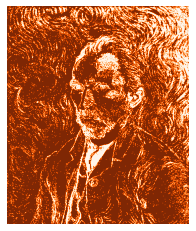

In [401]:
image , stroke_image = image(uncle , stroke_uncle)

# Extract foreground and background seed pixels from the stroke image
tolerance = 10

# Extract foreground and background seed pixels from the stroke image
foreground_seed, background_seed = seed_pixel(stroke_image)
N  = int(input("enter value of k: "))
# Segment the image
segmented_image = segment_image(image, foreground_seed, background_seed , N)

# Visualize the segmented image
plt.imshow(segmented_image, cmap='Oranges')
plt.axis('off')
plt.show()


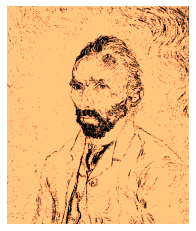

In [428]:
plt.imshow(segmented_image, cmap='copper')
plt.axis('off')
plt.show()


In [429]:
image , stroke_image = image(uncle , stroke_uncle)

# Extract foreground and background seed pixels from the stroke image
tolerance = 10

# Extract foreground and background seed pixels from the stroke image
foreground_seed, background_seed = seed_pixel(stroke_image)
N  = int(input("enter value of k: "))
# Segment the image
segmented_image_32 = segment_image(image, foreground_seed, background_seed , N)



enter value of k: 32


C:\Users\Thinpad\AppData\Local\Temp\ipykernel_13936\2659710443.py:60: RuntimeWarning: overflow encountered in exp
  probabilities[k] = weights[k] * np.exp((-wk * distance)**2)


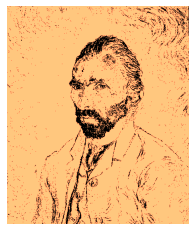

In [430]:
# Visualize the segmented image
plt.imshow(segmented_image_32, cmap='copper')
plt.axis('off')
plt.show()

running for 16

In [418]:
image , stroke_image = image(uncle , stroke_uncle)

# Extract foreground and background seed pixels from the stroke image
tolerance = 10

# Extract foreground and background seed pixels from the stroke image
foreground_seed, background_seed = seed_pixel(stroke_image)
N  = int(input("enter value of k: "))
# Segment the image
segmented_image_16 = segment_image(image, foreground_seed, background_seed , N)



enter value of k: 16


C:\Users\Thinpad\AppData\Local\Temp\ipykernel_13936\2659710443.py:60: RuntimeWarning: overflow encountered in exp
  probabilities[k] = weights[k] * np.exp((-wk * distance)**2)


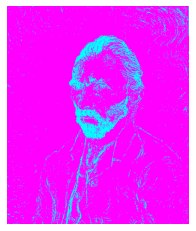

In [419]:
plt.imshow(segmented_image_16, cmap='cool')
plt.axis('off')
plt.show()


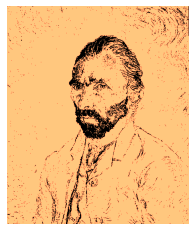

In [425]:
plt.imshow(segmented_image_16, cmap='copper')
plt.axis('off')
plt.show()


running for 8

In [422]:
image , stroke_image = image(uncle , stroke_uncle)

# Extract foreground and background seed pixels from the stroke image
tolerance = 10

# Extract foreground and background seed pixels from the stroke image
foreground_seed, background_seed = seed_pixel(stroke_image)
N  = int(input("enter value of k: "))
# Segment the image
segmented_image_8 = segment_image(image, foreground_seed, background_seed , N)



enter value of k: 8


C:\Users\Thinpad\AppData\Local\Temp\ipykernel_13936\2659710443.py:60: RuntimeWarning: overflow encountered in exp
  probabilities[k] = weights[k] * np.exp((-wk * distance)**2)


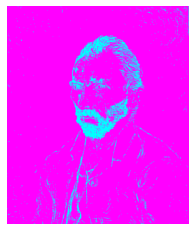

In [423]:
plt.imshow(segmented_image_8, cmap='cool')
plt.axis('off')
plt.show()


In [ ]:
plt.imshow(segmented_image_8, cmap='copper')
plt.axis('off')
plt.show()

In [ ]:
## for lady

running for 32 -> lady

In [433]:
image , stroke_image = image(lady , stroke_lady)

# Extract foreground and background seed pixels from the stroke image
tolerance = 10

# Extract foreground and background seed pixels from the stroke image
foreground_seed, background_seed = seed_pixel(stroke_image)
N  = int(input("enter value of k: "))
# Segment the image
segmented_image_lady_32 = segment_image(image, foreground_seed, background_seed , N)


enter value of k: 32


C:\Users\Thinpad\AppData\Local\Temp\ipykernel_13936\2659710443.py:60: RuntimeWarning: overflow encountered in exp
  probabilities[k] = weights[k] * np.exp((-wk * distance)**2)


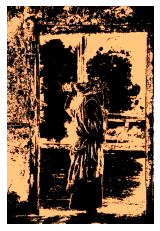

In [439]:
plt.imshow(segmented_image_lady_32, cmap='copper')
plt.axis('off')
plt.show()